# Pulling the pieces apart..

In this jupyter notebook, I will be eploring the csv exports created in the [API Notebook](http://localhost:8889/lab/tree/1_API.ipynb).  It is important to remember:

1 = HorrorMoviesONLY   
0 = AllThingsHorror *ie. r/horror*

___Table of Contents:___

- [Imports](#section1)
- [Pandas Profiling Reports](#section2)
- [EDA and Cleanup](#section3)  
    - [Combine Datasets](#section3a)   
    - [Most Common Words](#section3b)
- [Text Processing](#section4)   
    - [Length of Text](#section4a)
- [Export Data](#section5)


For this section, I have used the following resources:  
 [20 Pandas Functions that will boost your data analysis process](https://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05)    
[A better EDA with Pandas-profiling](https://towardsdatascience.com/a-better-eda-with-pandas-profiling-e842a00e1136)   
[Github: Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling)   

# Imports <a class="anchor" id="section1"></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#  Pandas Profiling Reports <a class="anchor" id="section2"></a>

In [2]:
s_df = pd.read_csv('./data/submissions.csv')
profile = s_df.profile_report(title='Submissions Profiling Report')
profile.to_file(output_file="./reports/2a_sub_pandas_profiling.html")

In [3]:
#Comments Dataframe:
c_df = pd.read_csv('./data/comments.csv')
profile = c_df.profile_report(title = 'Comments Profiling Report')
profile.to_file(output_file = './reports/3a_comm_pandas_profiling.html')

# EDA and Cleanup <a class="anchor" id="section3"></a>

In [4]:
s_df.head()

,subreddit,source,selftext,body
0,HorrorMoviesONLY,sub,NaN,Slaughter Of The Vampires 1962 movie trailer P...
1,HorrorMoviesONLY,sub,NaN,Dead Earth aka Two Of Us 2020 movie trailer Pl...
2,HorrorMoviesONLY,sub,https://www.youtube.com/channel/UC7duGHx5soCmf...,Review on “ ready or not “ what dose everyone ...
3,HorrorMoviesONLY,sub,NaN,New video: Trailer: Roh Mati Paksa (Indonesia ...
4,HorrorMoviesONLY,sub,NaN,Bloodshot 2020 movie trailer Plot: Ray Garriso...


In [5]:
#Submissions dataframe
s_df.describe()

,subreddit,source,selftext,body
count,2000,2000,866,2000
unique,2,1,514,1283
top,horror,sub,[removed],13 Most Disgusting Horror Movie Moments
freq,1000,2000,232,7


In [6]:
# selftext has 232 removed features and 1134 that are null
pd.DataFrame(({
    'removed':s_df.loc[s_df['selftext'] =='[removed]'].count(),
    'nulls':s_df.isnull().sum()
}))

,removed,nulls
subreddit,232,0
source,232,0
selftext,232,1134
body,232,0


In [7]:
s_df['subreddit'].value_counts()

horror              1000
HorrorMoviesONLY    1000
Name: subreddit, dtype: int64

In [8]:
#Changing HorroMoviesOnly to 1 and
s_df['subreddit']=s_df['subreddit'].map({'horror':0,'HorrorMoviesONLY':1})
s_df.head()

,subreddit,source,selftext,body
0,1,sub,NaN,Slaughter Of The Vampires 1962 movie trailer P...
1,1,sub,NaN,Dead Earth aka Two Of Us 2020 movie trailer Pl...
2,1,sub,https://www.youtube.com/channel/UC7duGHx5soCmf...,Review on “ ready or not “ what dose everyone ...
3,1,sub,NaN,New video: Trailer: Roh Mati Paksa (Indonesia ...
4,1,sub,NaN,Bloodshot 2020 movie trailer Plot: Ray Garriso...


In [9]:
s_df.shape

(2000, 4)

___There are no missing features in Comments___

In [10]:
c_df.head()

,subreddit,source,body
0,HorrorMoviesONLY,com,Hereditary
1,HorrorMoviesONLY,com,Love this one.
2,HorrorMoviesONLY,com,"I am a huge fan of pin head,Freddy,Jason,even ..."
3,HorrorMoviesONLY,com,This was an entertaining movie... you definite...
4,HorrorMoviesONLY,com,Really enjoyed it


In [11]:
#Comments dataframe
c_df.describe()

,subreddit,source,body
count,1550,1550,1550
unique,2,1,1264
top,horror,com,[deleted]
freq,1000,1550,20


In [12]:
#Changing HorroMoviesOnly to 1 and horror to 0
c_df['subreddit']=c_df['subreddit'].map({'horror':0,'HorrorMoviesONLY':1})
c_df.head()

,subreddit,source,body
0,1,com,Hereditary
1,1,com,Love this one.
2,1,com,"I am a huge fan of pin head,Freddy,Jason,even ..."
3,1,com,This was an entertaining movie... you definite...
4,1,com,Really enjoyed it


In [13]:
c_df.shape

(1550, 3)

## Combine Datasets <a class="anchor" id="section3a"></a>

In [14]:
df = s_df.append(c_df,sort=False,ignore_index=True)
df

,subreddit,source,selftext,body
0,1,sub,NaN,Slaughter Of The Vampires 1962 movie trailer P...
1,1,sub,NaN,Dead Earth aka Two Of Us 2020 movie trailer Pl...
2,1,sub,https://www.youtube.com/channel/UC7duGHx5soCmf...,Review on “ ready or not “ what dose everyone ...
3,1,sub,NaN,New video: Trailer: Roh Mati Paksa (Indonesia ...
4,1,sub,NaN,Bloodshot 2020 movie trailer Plot: Ray Garriso...
...,...,...,...,...
3545,0,com,NaN,I remember looking this one up on youtube. No...
3546,0,com,NaN,I had finally successfully repressed this memo...
3547,0,com,NaN,Info dump here on a lot of random things:\n\nO...
3548,0,com,NaN,This post was automatically removed because th...


___I will be removing self_text as a seperate column and instead include it into the body as seperate rows.  This increases my sample size to give me more to train and test on.  To differentiate them, I will mark the `source` as "subst" for insight analysis after my model has been run.___

In [15]:
self_text = df[df['selftext'].notnull()][['selftext','subreddit','source']]
self_text.rename(columns={"selftext":'body'},inplace=True)
self_text['source'] = 'subst'
self_text = self_text[self_text['body'] != 'Not given']
self_text = self_text.reindex(columns=['subreddit','source','body'])
self_text.reindex()
self_text

,subreddit,source,body
2,1,subst,https://www.youtube.com/channel/UC7duGHx5soCmf...
8,1,subst,https://youtu.be/aVQaVKl1DxU
13,1,subst,So I just finished watching doctor sleep and a...
28,1,subst,Did anyone here purchase the script from the t...
29,1,subst,"They pulled Child's Play, F13 Part 5, JGTH, Ja..."
...,...,...,...
1991,0,subst,[removed]
1996,0,subst,We all know the horror genre has taken a backs...
1997,0,subst,I went over 4th of July weekend to see Jurassi...
1998,0,subst,"Personally, I'm a huge fan of both. I'll almos..."


In [16]:
self_text.loc[self_text['body']=='[removed]'] = np.nan
self_text.dropna(inplace=True)

In [17]:
df.drop(columns=['selftext'],inplace=True)
df

,subreddit,source,body
0,1,sub,Slaughter Of The Vampires 1962 movie trailer P...
1,1,sub,Dead Earth aka Two Of Us 2020 movie trailer Pl...
2,1,sub,Review on “ ready or not “ what dose everyone ...
3,1,sub,New video: Trailer: Roh Mati Paksa (Indonesia ...
4,1,sub,Bloodshot 2020 movie trailer Plot: Ray Garriso...
...,...,...,...
3545,0,com,I remember looking this one up on youtube. No...
3546,0,com,I had finally successfully repressed this memo...
3547,0,com,Info dump here on a lot of random things:\n\nO...
3548,0,com,This post was automatically removed because th...


In [18]:
df = df.append(self_text,ignore_index=True)
df.reindex()
df

,subreddit,source,body
0,1.0,sub,Slaughter Of The Vampires 1962 movie trailer P...
1,1.0,sub,Dead Earth aka Two Of Us 2020 movie trailer Pl...
2,1.0,sub,Review on “ ready or not “ what dose everyone ...
3,1.0,sub,New video: Trailer: Roh Mati Paksa (Indonesia ...
4,1.0,sub,Bloodshot 2020 movie trailer Plot: Ray Garriso...
...,...,...,...
4179,0.0,subst,I recently finished American Horror Story: 198...
4180,0.0,subst,We all know the horror genre has taken a backs...
4181,0.0,subst,I went over 4th of July weekend to see Jurassi...
4182,0.0,subst,"Personally, I'm a huge fan of both. I'll almos..."


___I will drop all null values since we have a large dataset to work with.___

In [19]:
df.isnull().sum()

subreddit    0
source       0
body         0
dtype: int64

In [20]:
df

,subreddit,source,body
0,1.0,sub,Slaughter Of The Vampires 1962 movie trailer P...
1,1.0,sub,Dead Earth aka Two Of Us 2020 movie trailer Pl...
2,1.0,sub,Review on “ ready or not “ what dose everyone ...
3,1.0,sub,New video: Trailer: Roh Mati Paksa (Indonesia ...
4,1.0,sub,Bloodshot 2020 movie trailer Plot: Ray Garriso...
...,...,...,...
4179,0.0,subst,I recently finished American Horror Story: 198...
4180,0.0,subst,We all know the horror genre has taken a backs...
4181,0.0,subst,I went over 4th of July weekend to see Jurassi...
4182,0.0,subst,"Personally, I'm a huge fan of both. I'll almos..."


## Most Common Words <a class="anchor" id="section3b"></a>

I will compare the most common words in AllThingsHorror(0):`horror_df` vs HorrorMoviesOnly(1):`only_df`

In [21]:
horror_df = df.loc[df['subreddit']==0]
only_df = df.loc[df['subreddit']==1]

In [22]:
#adapted from Caroline's solution to DSI Lab 5.02
#AllThingsHorror
cv = CountVectorizer(stop_words='english')
cv.fit(horror_df['body'])

cv_horror = cv.transform(horror_df['body'])
df_cvec_horror = pd.DataFrame(cv_horror.todense(), columns=cv.get_feature_names())
%store df_cvec_horror

Stored 'df_cvec_horror' (DataFrame)


In [23]:
#HorrorMoviesOnly
cv = CountVectorizer(stop_words='english')
cv.fit(only_df['body'])

cv_only = cv.transform(only_df['body'])
df_cvec_only = pd.DataFrame(cv_only.todense(), columns=cv.get_feature_names())
%store df_cvec_only

Stored 'df_cvec_only' (DataFrame)


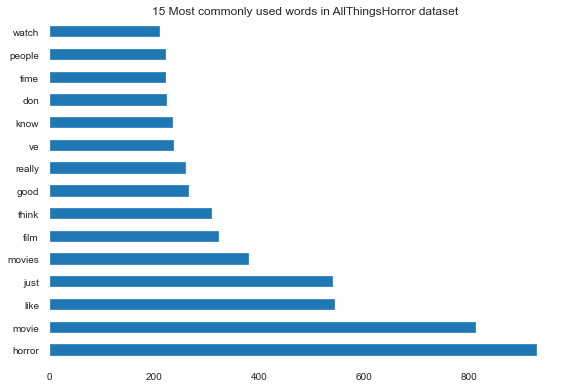

In [55]:
df_cvec_horror.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('15 Most commonly used words in AllThingsHorror dataset')
plt.tight_layout()
plt.savefig('images/h_common.png',bbox_inches='tight');

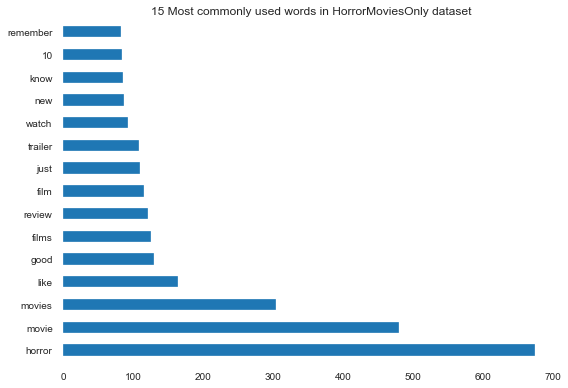

In [57]:
plt.title('15 Most commonly used words in HorrorMoviesOnly dataset')
df_cvec_only.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.tight_layout()
plt.savefig('images/o_common.png',bbox_inches='tight');

__Observation:__ The verbage is very similar in both datasets.  AllThingsHorror seems to be more wordy than HorrorMoviesOnly.  HorrorMoviesOnly has the word "trailer" in the top 15, which doesn't appear in the top AllThingsHorror at all. 

# Text Processing <a class="anchor" id="section4"></a>
I will clean the dataset further and then use VADER "SentimentIntensityAnalyzer" to give our data a sentiment analysis score for further prediction testing.

In [26]:
df['body'][0]

'Slaughter Of The Vampires 1962 movie trailer Plot: On their wedding night, a newlywed couple find themselves menaced by a bloodthirsty vampire.'

In [27]:
df['body'][106]

'Does anyone recall a strange movie on Netflix where a family thought their house was haunted but it turned out there was actually a man living in their walls?'

In [28]:
df['body'][20]

"What do you all think about Indonesian horror films? This is a trailer for 2020's Kajeng Kliwon | English Subtitles | Amanda Manopo | Horror"

___I am going to clean up the text a little bit further by removing punctuation and making it all lowercase.  Then I will return the text as a string to be added to the dataframe.  This should make future models easier to tokenize.___

In [29]:
def noise(text):
    #make it all lowercase
    text = text.str.lower()
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    text = text.astype('str')
    return text

In [30]:
df['body'] = noise(df['body'])
df.head()

,subreddit,source,body
0,1.0,sub,slaughter of the vampires 1962 movie trailer p...
1,1.0,sub,dead earth aka two of us 2020 movie trailer pl...
2,1.0,sub,review on ready or not what dose everyone think
3,1.0,sub,new video trailer roh mati paksa indonesia 202...
4,1.0,sub,bloodshot 2020 movie trailer plot ray garrison...


___VADER Sentiment Analyzer___
I am using VADER because even though horror movies are a specific type of "negative" sounding discussions, VADER does a good job of evening that out across all texts.  The reason is that we are looking for words like good, happy, and cool instead of just scary.  See more information [here.](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)

We must use VADER in the the absense of a good lexicon for horror films. BUT, I did remove versions of horror and scary from the VADER lexicon, defined in the `horror_list`, and set it as the lexicon file.  

In [31]:
sia = SentimentIntensityAnalyzer()

In [32]:
horror_list = ['horrific','horrifically','horrified','horrifies','horrify','horrifying','horrifyingly','horror','horrors','scare','scarecrow',
'scarecrows','scared','scarer','scarers','scares','scaring','scary','dead','slaughter','blood','bloodshed']

for word in horror_list:
    if word in sia.lexicon:
        sia.lexicon.pop(word)

In [33]:
#adapted from Echelon NLP and Sentiment Analysis review
score_dicts = []

for comment in df['body']:
    scores = sia.polarity_scores(comment)
    score_dicts.append(scores)
    
scores = pd.DataFrame(score_dicts)
scores.head()

,neg,neu,pos,compound
0,0.124,0.876,0.000,-0.4019
1,0.080,0.920,0.000,-0.4019
2,0.000,0.762,0.238,0.3612
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000


In [34]:
df = pd.concat([df,scores],axis=1)

In [35]:
df.sort_values(by='neg', ascending=True).head(20)

,subreddit,source,body,neg,neu,pos,compound
3676,1.0,subst,deleted,0.0,1.000,0.000,0.0000
1854,0.0,sub,can we all agree that telling someone theres a...,0.0,0.848,0.152,0.3612
3587,1.0,subst,i have been looking for this movie for a long ...,0.0,0.888,0.112,0.4404
1857,0.0,sub,the beach house and the mist,0.0,1.000,0.000,0.0000
3585,1.0,subst,what are the best horror mivies on netflix people,0.0,0.656,0.344,0.6369
1859,0.0,sub,anyone else sometimes hear slasher music faint...,0.0,1.000,0.000,0.0000
1864,0.0,sub,the collection is on right now forgot how grea...,0.0,0.815,0.185,0.7096
1865,0.0,sub,need help finding a movie that scarred me as a...,0.0,0.748,0.252,0.4019
1853,0.0,sub,the house that jack built on hulu,0.0,1.000,0.000,0.0000
1866,0.0,sub,should hostel be rebooted,0.0,1.000,0.000,0.0000


In [36]:
#give a sentiment score of 1 for positive AND neutral and 0 for negative
df.insert(7, 'sentiment', df['compound'])
df

,subreddit,source,body,neg,neu,pos,compound,sentiment
0,1.0,sub,slaughter of the vampires 1962 movie trailer p...,0.124,0.876,0.000,-0.4019,-0.4019
1,1.0,sub,dead earth aka two of us 2020 movie trailer pl...,0.080,0.920,0.000,-0.4019,-0.4019
2,1.0,sub,review on ready or not what dose everyone think,0.000,0.762,0.238,0.3612,0.3612
3,1.0,sub,new video trailer roh mati paksa indonesia 202...,0.000,1.000,0.000,0.0000,0.0000
4,1.0,sub,bloodshot 2020 movie trailer plot ray garrison...,0.000,1.000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...
4179,0.0,subst,i recently finished american horror story 1984...,0.000,0.791,0.209,0.7650,0.7650
4180,0.0,subst,we all know the horror genre has taken a backs...,0.000,0.842,0.158,0.7684,0.7684
4181,0.0,subst,i went over 4th of july weekend to see jurassi...,0.055,0.813,0.131,0.7906,0.7906
4182,0.0,subst,personally im a huge fan of both ill almost al...,0.038,0.787,0.175,0.9895,0.9895


In [37]:
df['sentiment']=df['sentiment'].apply(lambda x: 1 if x>=0 else 0)
df

,subreddit,source,body,neg,neu,pos,compound,sentiment
0,1.0,sub,slaughter of the vampires 1962 movie trailer p...,0.124,0.876,0.000,-0.4019,0
1,1.0,sub,dead earth aka two of us 2020 movie trailer pl...,0.080,0.920,0.000,-0.4019,0
2,1.0,sub,review on ready or not what dose everyone think,0.000,0.762,0.238,0.3612,1
3,1.0,sub,new video trailer roh mati paksa indonesia 202...,0.000,1.000,0.000,0.0000,1
4,1.0,sub,bloodshot 2020 movie trailer plot ray garrison...,0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...,...
4179,0.0,subst,i recently finished american horror story 1984...,0.000,0.791,0.209,0.7650,1
4180,0.0,subst,we all know the horror genre has taken a backs...,0.000,0.842,0.158,0.7684,1
4181,0.0,subst,i went over 4th of july weekend to see jurassi...,0.055,0.813,0.131,0.7906,1
4182,0.0,subst,personally im a huge fan of both ill almost al...,0.038,0.787,0.175,0.9895,1


In [38]:
df['sentiment'].value_counts()

1    3077
0    1107
Name: sentiment, dtype: int64

## Length of Text <a class="anchor" id="section4a"></a>
In my final EDA step, I will add two columns.  One for length of characters and one for a count of how many words appear.

In [39]:
df['body_len']= df['body'].map(len)
df['word_len'] = [len(ea.split()) for ea in df['body']]
df

,subreddit,source,body,neg,neu,pos,compound,sentiment,body_len,word_len
0,1.0,sub,slaughter of the vampires 1962 movie trailer p...,0.124,0.876,0.000,-0.4019,0,140,22
1,1.0,sub,dead earth aka two of us 2020 movie trailer pl...,0.080,0.920,0.000,-0.4019,0,178,34
2,1.0,sub,review on ready or not what dose everyone think,0.000,0.762,0.238,0.3612,1,49,9
3,1.0,sub,new video trailer roh mati paksa indonesia 202...,0.000,1.000,0.000,0.0000,1,90,13
4,1.0,sub,bloodshot 2020 movie trailer plot ray garrison...,0.000,1.000,0.000,0.0000,1,113,17
...,...,...,...,...,...,...,...,...,...,...
4179,0.0,subst,i recently finished american horror story 1984...,0.000,0.791,0.209,0.7650,1,158,29
4180,0.0,subst,we all know the horror genre has taken a backs...,0.000,0.842,0.158,0.7684,1,172,34
4181,0.0,subst,i went over 4th of july weekend to see jurassi...,0.055,0.813,0.131,0.7906,1,445,88
4182,0.0,subst,personally im a huge fan of both ill almost al...,0.038,0.787,0.175,0.9895,1,1385,257


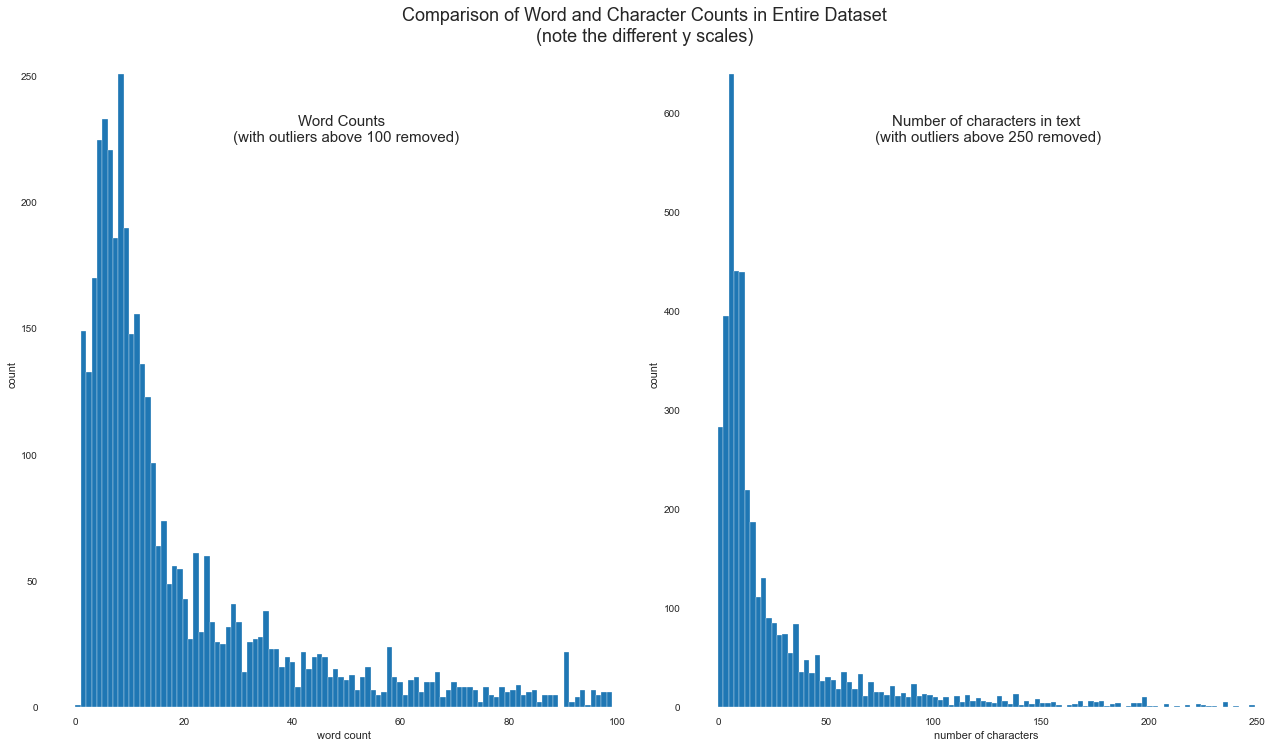

In [48]:
plt.figure (figsize=(18,10))
plt.suptitle('Comparison of Word and Character Counts in Entire Dataset\n(note the different y scales)',va='bottom',fontsize=18)
ax1 = plt.subplot(1,2,1)
ax1.hist(df[df['word_len']<100]['word_len'],bins=100)
ax1.set_title('Word Counts \n (with outliers above 100 removed)',pad=-100,fontsize=15)
ax1.set_ylabel('count')
ax1.set_xlabel('word count')

ax2=plt.subplot(1,2,2)
ax2.hist(df[df['word_len']<250]['word_len'],bins=100)
ax2.set_title('Number of characters in text\n (with outliers above 250 removed)',pad=-100,fontsize=15)
ax2.set_ylabel('count')
ax2.set_xlabel('number of characters')

plt.tight_layout()
plt.savefig('images/all_counts.png',bbox_inches='tight');

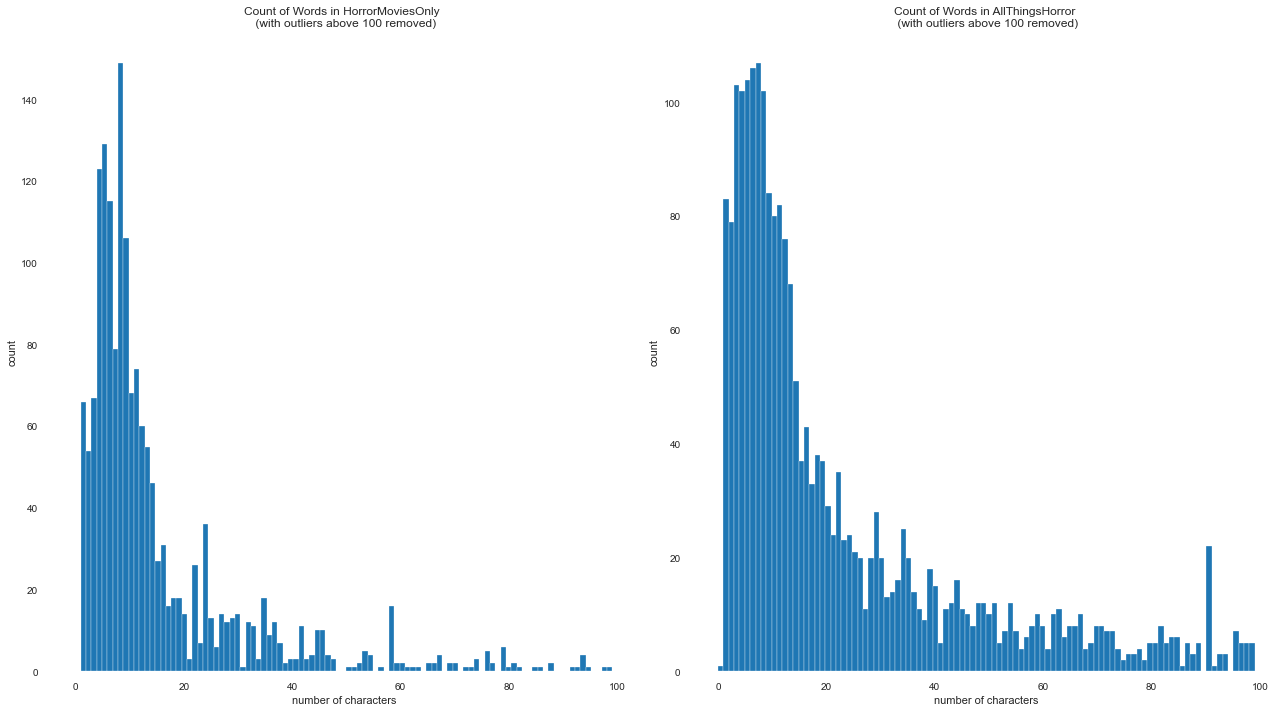

In [41]:
plt.figure (figsize=(18,10))
ax1 = plt.subplot(1,2,1)
ax1.hist(df[(df['subreddit']==1)&(df['word_len']<100)]['word_len'],bins = 100)
ax1.set_title('Count of Words in HorrorMoviesOnly \n (with outliers above 100 removed)')
ax1.set_ylabel('count')
ax1.set_xlabel('number of characters')

ax2=plt.subplot(1,2,2,sharex=ax1)
ax2.hist(df[(df['subreddit']==0)&(df['word_len']<100)]['word_len'],bins = 100)
ax2.set_title('Count of Words in AllThingsHorror \n (with outliers above 100 removed)')
ax2.set_ylabel('count')
ax2.set_xlabel('number of characters')

plt.tight_layout()
plt.savefig('images/wordcount_forum.png');

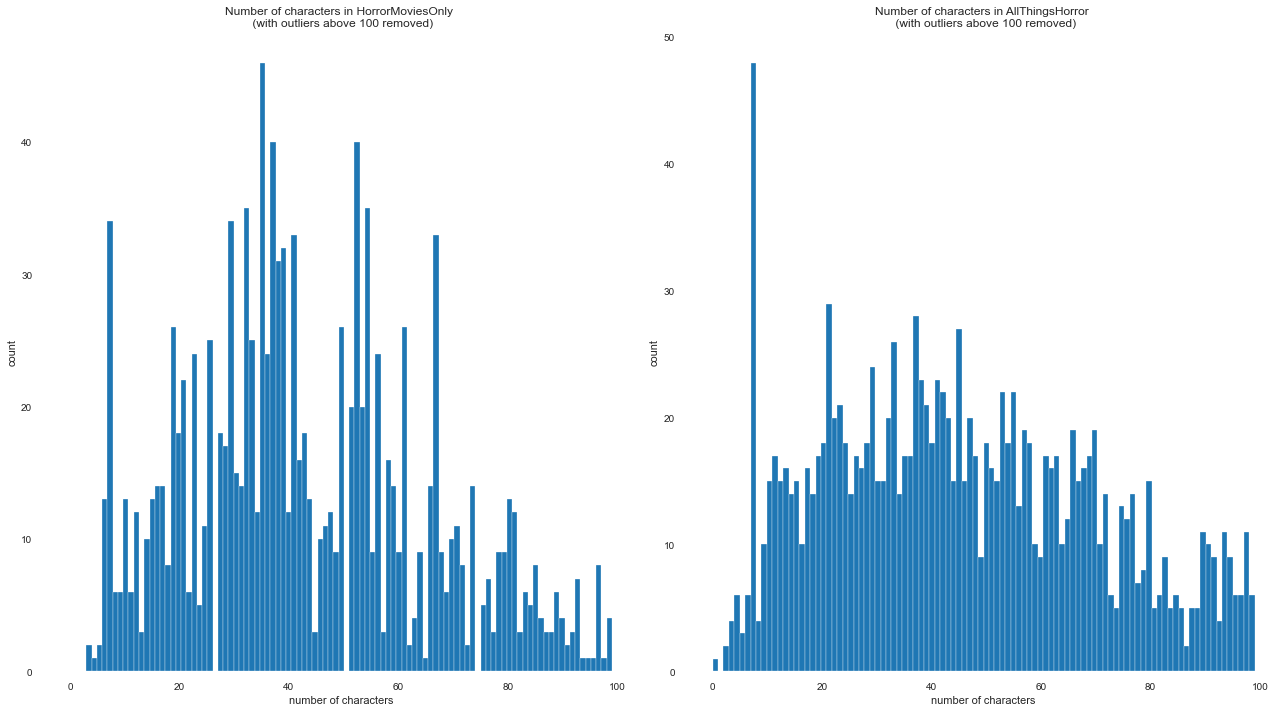

In [42]:
plt.figure (figsize=(18,10))
ax1 = plt.subplot(1,2,1)
ax1.hist(df[(df['subreddit']==1)&(df['body_len']<100)]['body_len'],bins = 100)
ax1.set_title('Number of characters in HorrorMoviesOnly \n (with outliers above 100 removed)')
ax1.set_ylabel('count')
ax1.set_xlabel('number of characters')

ax2=plt.subplot(1,2,2,sharex=ax1)
ax2.hist(df[(df['subreddit']==0)&(df['body_len']<100)]['body_len'],bins = 100)
ax2.set_title('Number of characters in AllThingsHorror \n (with outliers above 100 removed)')
ax2.set_ylabel('count')
ax2.set_xlabel('number of characters')

plt.tight_layout()
plt.savefig('images/charcount_forum.png');

In [43]:
df_sentiment = df.drop(columns=['neg','neu','pos','compound'])

# Export Data <a class="anchor" id="section5"></a>

In [44]:
c_df.to_csv('./data/clean_com.csv',index=False)

In [45]:
s_df.to_csv('./data/clean_sub.csv',index=False)

In [46]:
df.to_csv('./data/clean_all.csv',index=False)

In [47]:
df_sentiment.to_csv('./data/clean_sentiment.csv',index=False)